# Bin Packing Lab

- Authors:
  - Arvind Shastri, shasta2@mcmaster.ca (owner)
  - Stanley Nguyen, nguyes44@mcmaster.ca
- Group ID on Avenue: 48
- Gitlab URL: https://gitlab.cas.mcmaster.ca/shasta2/l2-bin-packing.git

## The Bin Packing Problem

Bin packing is an NP-hard optimization problem, whose goal is to pack items of certain weight into bins with certain capacity constraints. This lab deals with 1D bin packing, using an infinite amount of fixed capacity bins to pack a set of weighted items into. 

This lab considers `Offline` algorithms, who can see the entire set of items to be packed from the beginning, as well as `Online` algorithms, who can only see one object at a time. 

Before we begin working with the codebase, we must understand its structure and the design choices around it. We must also analyze the different methods of which we expect input from the dataset to our algorithms.

## SOLID Principles


The given codebase follows the open-closed principle, particularly in the way it implements the algorithms and readers. The abstract classes `Online` and `Offline` define the abstract methods that any online/offline algorithm should have. This abstraction allows the code to be open for extension, as algorithms simply inherit these classes and build on top of them. The codebase is closed for modification as we do not need to modify existing classes to implement new algorithms. 

The same principle applies to readers; the abstract base class `DatasetReader` determines what methods each type of reader should have. This is open for extension because as we add new readers to accomodate for new types of data, they inherit the from the `DatasetReader` class. Similar to the algortihms, it is closed for modification as we do not need to modify existing classes to implement a new reader.

Moreover, each of the individual algorithms follow the single responsibility principle. This 
is because in the class of each algorithm, there is only one task that the class must
accomplish, and that is to provide the process of bin packing (in their respective way).
Algorithm classes do not deal with manipulating, reading, or categorizing data, hence 
isolating their responsibility.




## Dimensions of Dataset

#### Binpp

For each instance of the bin packing problem, we are provided with a single
file. The first line contains the number of items, `n`. The second line contains
the maximum capacity of each bin, `c`. The remaining lines contain the weights of 
each individual item, beginning at object 1 and ending at item `n`. This structure
is reflected in the `BinppReader`, as we read the first line as the number of item,
the second line as the capacity, then the third line and onward as item weights. Once the `BinppReader` has processed the file in its entirety, it returns a WeightSet which is the standardized input to each of our algorithms.
The algorithms do not directly use the number of items, `n`.

#### Binpp-Hard

Identical to `binpp`, as we are given a single file for each instance of 
the bin packing problem. The first line is the number of items, `n`, second is the 
max capacity of each bin, `c`, and every line after contains the weight of item 1
to item n. The structure is reflected by the use of the same reader for `binpp`, `BinppReader`;
the first line is the number of objects, the second line is the capacity,
then the third line and onward are item weights. The only difference in this dataset
is that the overall values for number of items, max capacity, and average weight 
are significantly larger than `binpp`.

#### Jburkardt

For each instance of the bin packing problem, we are provided with 3
files. The first file (denoted with `_c`) gives us our maximum capacity for each bin, `c`.
The second file (denoted with `_s`) gives us the priority of each item - we interpret the highest priority item in this file to be  the largest number. The third file (denoted with `_w`) gives us the 
weight of each item. This structure is reflected in the implemented `JburkardtReader`, as we 
read the first file as our max capacity, the second as our priorities, and the third
 as our weights. Similarly to `BinppReader`, once the `JburkardtReader` has fully parsed through each of the files, it returns to us a `WeightSet`. As aforementioned, WeightSet is a standardized input to each of our algorithms. The priorities are not used in the algorithms, as we have pre-implemented Online/Offline abstract base classes that do not accomodate for it 
via input parameters.

Now that we understand the codebase, we can begin our demonstration of our implementations using the codebase.

## Importing Required Modules

This cell imports all required modules related to this library.

In [1]:
from macpacking.reader import DatasetReader, BinppReader, JburkardtReader
from macpacking.model  import Online, Offline
from macpacking.algorithms.online import \
    FirstFit, BestFit, WorstFit
from macpacking.algorithms.offline import \
    FirstFitDecreasing, BestFitDecreasing, WorstFitDecreasing

Here, we declare the location of a sample dataset to demonstrate algorithm output in this library. This involves allowing a reader to process the dataset to return a standardized WeightSet. This is done by calling either an `.offline()` or `.online()` method to correctly format the data. 
We print the dataset file location, as well as the properties of the derived WeightSet for clarity.

In [2]:
dataset = '_datasets/binpp/N1C1W1/N1C1W1_B.BPP.txt'
reader: DatasetReader = BinppReader(dataset)
data = reader.offline()
print(f'Dataset: {dataset}')
print(f'  - Bin Capacity: {data[0]}')
print(f'  - Weight of objects to pack: {sorted(data[1])}')

Dataset: _datasets/binpp/N1C1W1/N1C1W1_B.BPP.txt
  - Bin Capacity: 100
  - Weight of objects to pack: [8, 8, 12, 13, 13, 14, 15, 17, 18, 19, 20, 23, 30, 37, 37, 39, 40, 43, 43, 44, 44, 50, 51, 61, 61, 62, 62, 63, 66, 67, 69, 70, 71, 72, 75, 76, 76, 79, 83, 83, 88, 92, 92, 93, 93, 97, 97, 97, 99, 100]


With the derived WeightSet of the corresponding dataset now available, we are able to demonstrate any of the bin packing algorithms. According to the class of the given algorithm, the data is formatted into an `Iterator` for `Online` algorithms, and an `Iterable` list for `Offline` algorithms. The corresponding method allows the algorithm to process the data accordingly.

To show the results of the algorithm, we print out its produced solution. Below, the solution is displayed as a list of bins containing the weighted items, as well as the total number of bins used. 

In [3]:
strategy: Offline = FirstFit()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 31
[[40, 44], [44, 43, 13], [50, 43], [51, 39], [61, 13, 20], [61, 37], [62, 23, 15], [62, 37], [63], [66, 30], [67], [69, 8, 18], [70], [71], [72, 14, 12], [75], [76], [76], [79, 19], [83], [83, 17], [88, 8], [92], [92], [93], [93], [97], [97], [97], [99], [100]]


## Bin Packing KPI Benchmarking

To judge the relative effectiveness of our algorithms against one another, we must measure how an individual algorithm performs with respect to a given KPI, then compare the results of that measurement to the other algorithms. 

One standard KPI to evaluate the algorithms' solutions is the average number of bins used. In the event of multiple algorithms using the same number of bins, other KPIs allow us to measure the effectiveness of these algorithms in other ways. Another KPI, average bin usage, is both represented as the percentage usage of each bin, as well as the average remaining space of each solution's bins. Finally, the average number of comparisons allows us to describe how many times the solution's existing bins are accessed.

Below is a working example of measuring the defined algorithms using these KPIs with a selected dataset in the `Binpp` class of cases, particularly cases in `N2C2W2`. The individual case locations are broken up by the `list_case_files` helper function, which would do a similar task for the `Jburkardt` dataset.

In [4]:
from helpers import list_case_files
from sample_bench import Benchmark

benchmark = Benchmark()
algorithms = [FirstFit(), BestFit(), WorstFit(), FirstFitDecreasing(), BestFitDecreasing(), WorstFitDecreasing()]
CASES = './_datasets/binpp/N2C2W2'
cases = list_case_files(CASES)


print("Analysis of Average Bins Created")
print("─" * 32)
benchmark.numberBins(cases, BinppReader, algorithms)

print("Analysis of Average Bin Usage as Percentage")
print("─" * 43)
benchmark.binUsage(cases, BinppReader, algorithms)

print("Analysis of Average Remaining Space")
print("─" * 35)
benchmark.remainingSpace(cases, BinppReader, algorithms)

print("Analysis of Average Comparisons")
print("─" * 31)
benchmark.numberComparisons(cases, BinppReader, algorithms)

Analysis of Average Bins Created
────────────────────────────────
FirstFit:            55.75     
BestFit:             55.05     
WorstFit:            61.35     
FirstFitDecreasing:  52.6      
BestFitDecreasing:   52.6      
WorstFitDecreasing:  52.65     


Analysis of Average Bin Usage as Percentage
───────────────────────────────────────────
FirstFit:            89.3086   
BestFit:             90.4392   
WorstFit:            81.151    
FirstFitDecreasing:  94.6919   
BestFitDecreasing:   94.6919   
WorstFitDecreasing:  94.5991   


Analysis of Average Remaining Space
───────────────────────────────────
FirstFit:            12.8297   
BestFit:             11.473    
WorstFit:            22.6187   
FirstFitDecreasing:  6.3697    
BestFitDecreasing:   6.3697    
WorstFitDecreasing:  6.4811    


Analysis of Average Comparisons
───────────────────────────────
FirstFit:            2454.65   
BestFit:             2795.55   
WorstFit:            3028.0    
FirstFitDecreasing:  2699.45   


### &rarr; Design Choices for Adaptable Benchmarks

The `Benchmark` class was implemented to separate the concern of benchmarking from the rest of the module. Its isolated responsibility is to calculate averages of the data based on certain defined methods, and summarize the data as hashmaps in key-value pairs. The standardized data from each benchmark function is passed to a common helper function that outputs the data. This business logic is separated from the rest of the benchmarking protocol; helper functions help to isolate responsibility by isolating reading, formatting and outputting data. This follows the single-responsibility and separation of concern rules.

To allow for adaptable benchmarks, the code adapts to new implementations of offline and online algorithms in the codebase in order to select the appropriate `.offline()` or `.online()` method of reading given data. This is done through list comprehension in the initialization of the Benchmark object, which gathers objects corresponding to their declarations in the `Online.py` file. This allows a quick categorization of whether the algorithm that the benchmark is currently reading is `Online` or `Offline`. This design choice allows any algorithms from either class of algorithm to be included in the benchmarks.

In correlation, a list of algorithms is given in the prevalent benchmark method so as to not limit the number of algorithms that can be compared. The user can add and remove any defined algorithm in either class and compare their outputs in this fashion at once, rather than running 6 different benchmarks for 6 different algorithms.


In summary, the user-friendly presentation of the benchmarks allows for quick comparison between precise values of algorithm outputs in a tabular fashion. Any algorithm defined in either class can be compared in one benchmark output, without having to declare multiple benchmarks for the same KPI. This implementation ensures expandable code, as well as adaptable benchmarking protocol.





## Execution Time Benchmarking

To benchmark the execution time of our algorithms, we had to choose cases to run our algorithms against. Select cases were chosen from each category data that were representative of the variance within that category. Results of each algorithm were strictly respective to these categories, as some algorithms may perform better or worse for varying difficulty of inputs. 

We plotted the results of each dataset class separately for readability and fairness. It would be unfair to compare a case from one dataset class to another due to the inherent difficulty variance between their cases.

The eight cases chosen from the `Binpp` dataset below represent variance in the item weights, bin capacities, and number of items to pack. We believe these cases provide a fair and broad representation of the dataset, as there are a larger number of cases in comparison to the other datasets classes.


From the `Binpp` dataset class, we chose the "A" file from each folder, as we felt that by doing so, we would give as broad a representation of the dataset class as possible, as there are a significantly larger number of cases in `Binpp` in comparison to the other dataset classes. For both `BinppHard` and `Jburkardt` dataset classes, we were able to fully represent the dataset as the total number of cases displayed good variance in all three dimensions. Moreover, the number of cases in each class of dataset would not provide an overwhelming amount of information.

In [5]:
listOfBinppCases = [
    './_datasets/binpp/N1C1W1/N1C1W1_A.BPP.txt',
    './_datasets/binpp/N1C3W4/N1C3W4_A.BPP.txt',
    './_datasets/binpp/N2C1W1/N2C1W1_A.BPP.txt',
    './_datasets/binpp/N2C3W4/N2C3W4_A.BPP.txt',
    './_datasets/binpp/N3C1W1/N3C1W1_A.BPP.txt',
    './_datasets/binpp/N3C3W4/N3C3W4_A.BPP.txt',
    './_datasets/binpp/N4C1W1/N4C1W1_A.BPP.txt',
    './_datasets/binpp/N4C3W4/N4C3W4_A.BPP.txt'
]

listOfBinppHardCases = list_case_files('./_datasets/binpp-hard')
listOfJburkardtCases = list_case_files('./_datasets/jburkardt')

The execution time analysis of the above cases was performed beforehand through the command `python executionTimeAnalysis.py -o executionTimeOutput.json`. This `pyperf` command allows the benchmarking data to be categorized and formatted into a `.json` file. For 22 cases across 6 algorithms, this benchmarking took 1 hour to complete. For the sake of brevity, the results were captured and parsed in a `.csv` file using `python -m pyperf show executionTimeOutput.json > output.csv -q`. This code is not written with extendability in mind, as it is solely for the purpose of the one-time execution time benchmark that was done beforehand. It is, however, separated from the rest of the benchmarking protocol as an extension of the helper functions that parse and read data.

The `Plotter` abstract class implements an abstract method `plot` to depict each list of cases according to the required output. It takes the list of cases and reader as input in order to generate x-axis labels and format the given input into a plot. There are formatting methods within the `Plotter` classes that allow the graphs to be expandable. The plots adapt to the number of inputs that need to be grouped, as well as the labeling and positioning on the x-axis. The size of the plot, the legend, and the presentation of the plot is completely extendable according to SOLID principles.

For the following execution time analysis, the location of the output is ideally labeled for the user to input. In an ideal case where `pyperf` output of the same nature can be selected from the codebase, then this function is adaptable to both parse and analyze the data. Below is the plot of the generated `pyperf` execution time results:

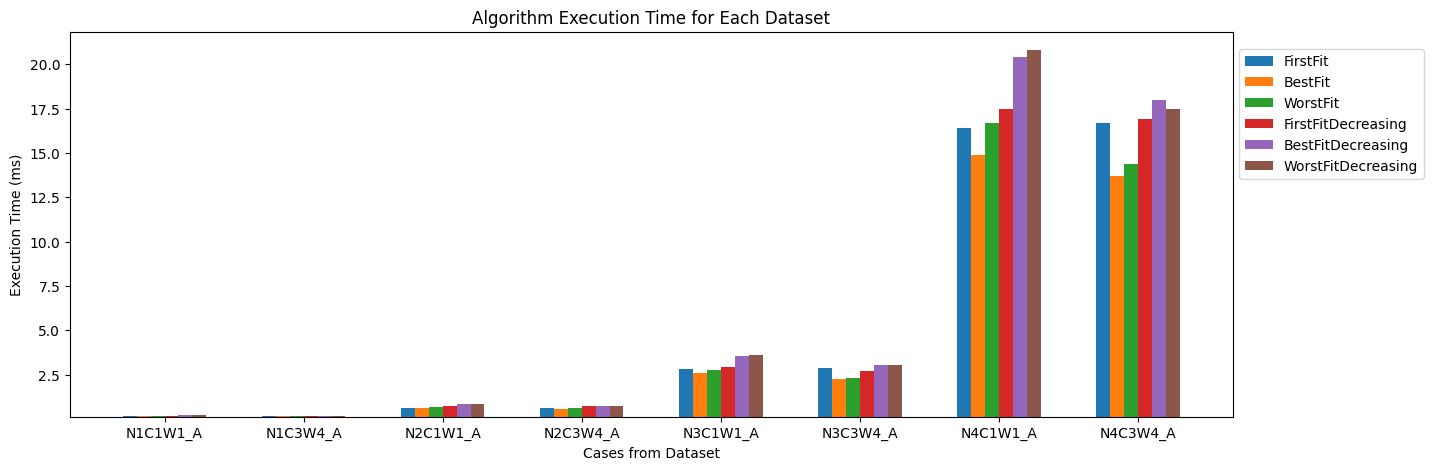

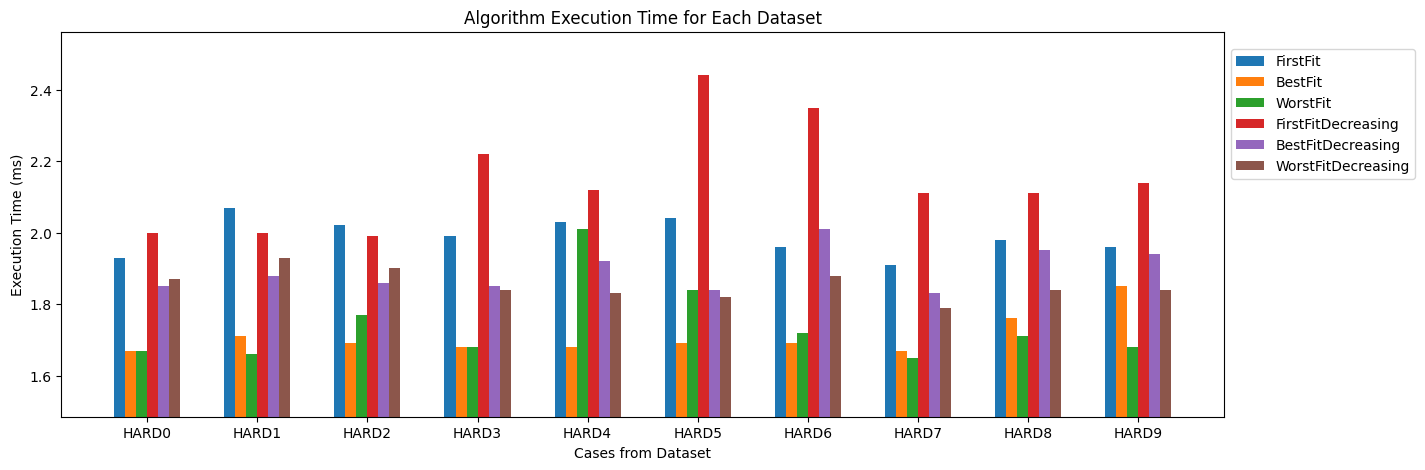

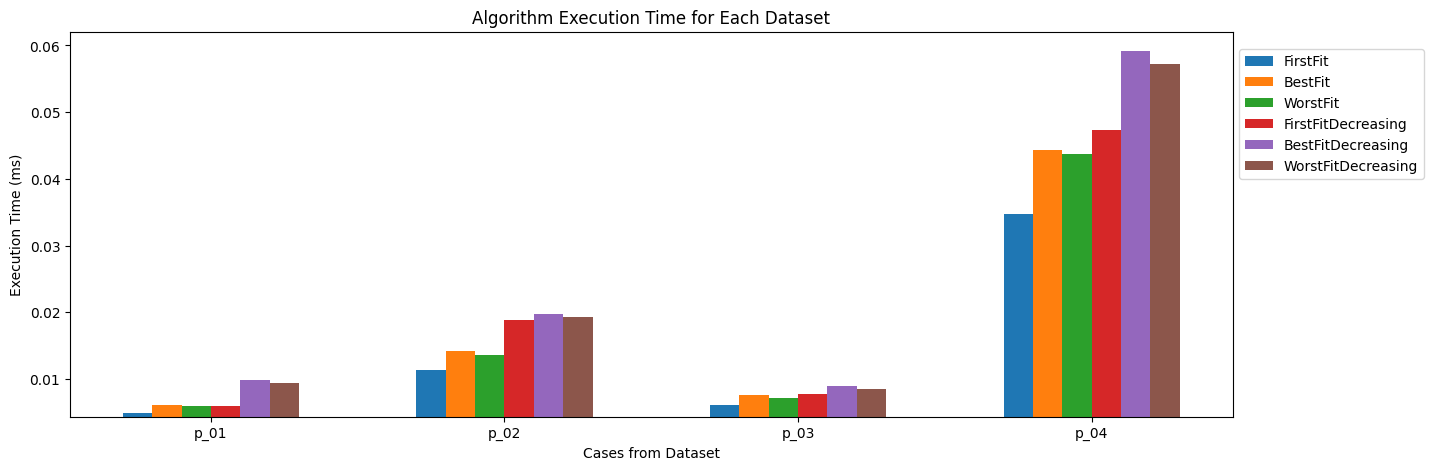

In [6]:
from plotter import ExecTimePlot
from executionTimeAnalysis import executionTimeOutput

output = './output.csv'

binppTimePlot, binppHardTimePlot, jburkardtTimePlot = \
executionTimeOutput(output, listOfBinppCases, listOfBinppHardCases, listOfJburkardtCases)

plot = ExecTimePlot()
plot.plot(binppTimePlot, listOfBinppCases, BinppReader)
plot.plot(binppHardTimePlot, listOfBinppHardCases, BinppReader)
plot.plot(jburkardtTimePlot, listOfJburkardtCases, JburkardtReader)

## Algorithm Analysis

With the generated data shown above, we will now reason the results for each algorithm. In addition, we will provide a brief description of the algorithm to provide context for our reasoning. 

### Online Algorithms

#### FirstFit

With a given item, we determine its corresponding bin by scanning from left to right among the present bins, and stopping when we are able to place the item into the first bin that it is able to fit in. If we cannot fit the item in an existing bin, we create a new bin and place it there. 

#### BestFit

With a given item, we determine its corresponding bin by scanning fully from left to right among the present bins. We then choose from among the present bins, the bin with the least amount of remaining space. If we cannot fit the item in an existing bin, we create a new bin and place it there. We note the observervation that for each item, we would have to iterate through and check each existing bin in order to determine the tightest fit.

#### WorstFit

With a given item, we determine its corresponding bin by scanning fully from left to right among the present bins. We then choose from among the present bins, the bin with the most amount of remaining space. If we cannot fit the item in an existing bin, we create a new bin and place it there. We can observe that for each item, we would have to iterate through and check every present bin to determine the most free bin.


#### Average Number of Bins


Each algorithm's method of coming to a solution provides insight into the average number of 
bins they will use.


The BestFit algorithm's strategy attempts to pack bins as tightly as possible by fitting items into the least amount of space, ultimately leading to the least number of bins created out of the three. In comparison, WorstFit packs items into bins with the MOST amount of remaining space, 
creating a relatively poor solution with a majority of loosely packed bins due to this strategy. 
On the other hand, since FirstFit does not have a specific strategy to reduce the number of bins it uses, 
its performance is an intermediate of the three. 


#### Average Usage (percentage usage, remaining space)


Following the visualizations of all three algorithms' solutions, it is reasonable to conclude that the BestFit algorithm optimizes the average percentage usage of each bin 
greater than the others. Its goal to pack items into bins with the least remaining space ensures a higher percentage of tightly filled bins than the other two.
By contrast, WorstFit lends itself to the least percentage bin usage of the three algorithms, since it actively searches for the least tightest fit possible for each item.
FirstFit's lackluster strategy again performs mediocre between these two algorithms, as its goal does not actively seek to utilize the capacity of each bin to the max.


#### Average Comparisons


In FirstFit, an item will be compared to bins up until there is one that it will fit in. No more comparisons will be made for that item, since the algorithm will automatically pack it
into that selected bin. In contrast, BestFit and WorstFit make comparisons proportional to the number of bins in their solution at that given time. 
Both these algorithms are forced to make comparisons for every existing bin to find either the tightest or loosest bin to pack the item in. 
The selected bin cannot be decided until all bins are checked, hence the number of comparisons increases as the number of existing bins increases. 
This can be concluded following the arguments for the number of bins for both algorithms.

It can be conjectured that, between these three, FirstFit makes the least number of comparisons, 
on average O(n^2/2), where n is the number of existing bins. While BestFit and WorstFit both make O(n^2) comparisons, an argument can be made that since average number of existing bins is larger in comparison to BestFit, WorstFit will make more comparisons on average. 

An observation can be made that as the size of the given dataset increases, the difference in the number of existing bins between BestFit and WorstFit at any given time will increase, hence more comparisons are required for WorstFit in comparison due to longer iterations. 


#### Average Execution Time


Following the argument for average number of comparisons, we can expect the average execution time of these algorithms to be in correspondence to the number of bins in their solutions, 
as well as the number of accesses to their existing bins. Using this, we can argue that FirstFit's execution time is the least of the three, as the typical case involves 
finding the correct bin to pack towards the middle of the bins. A full iteration is not required for each item (although this would be a worst case), as opposed to BestFit and WorstFit.
Using the observations gathered from the average number of bins and comparisons, we can reason that both of these algorithms will result in a longer execution time than FirstFit. 
Moreover, one can notice that as the size of the given dataset increases, the execution time of WorstFit grows larger than BestFit. By creating more bins in its solution
and requiring more comparisons, WorstFit will in turn lead to greater execution times.



#### Summary of Analysis

The results of this analysis can be summarized below in order of best to worst:

**Average Bins:** BestFit, FirstFit, WorstFit

**Average Usage:** BestFit, FirstFit, WorstFit

**Average Comparisons:** FirstFit, BestFit, WorstFit

**Average Execution Time:** FirstFit, BestFit, WorstFit


### Offline Algorithms

These algorithms, across the board, perform better than their online counterparts in terms of the goals each algorithm has in mind. This is due to the nature of offline algorithms, and how they are able to view all of the items rather than one item at a time like online algorithms. By sorting by descending order, this leads to `First Fit Decreasing` averaging less bins created, `Best Fit Decreasing` creating a tighter average bin space, and `Worst Fit Decreasing` creating a larger average remaining bin space, all in comparison to their online counterparts.

## Comparison to Optimal Values

Another way to judge our algorithms and their effectiveness is to compare the number of bins created in their solution with the optimal (minimum) number of bins created.

Data from the `oracle.xlsx` file was converted into `.csv` files and parsed. `OracleReader` is a class whose single responsibility is to format the given dataset cases so as to make them plottable using `Plotter`. First we define the `Oracle` object and the locations of the `.csv` files to parse, and pass these files to generate dictionaries for comparison:

In [7]:
from oracle_compare import OracleReader

oracle = OracleReader()

binppCSV = './_datasets/binpp.csv'
binppHardCSV = './_datasets/binpp-hard.csv'
jburkardtCSV = './_datasets/jburkardt.csv'

binppDict, binppHardDict, jburkardtDict = oracle.oracleDictionaries(binppCSV, binppHardCSV, jburkardtCSV)

We evaluate the margin of improvement by both continuous and discrete means. Continuous evaluation of the margin is depicted through the bar graph, as the difference between each algorithms number of bins is shown visually against the optimal number. We designed discrete evaluation of the margin to be toggled at the tester's discretion by passing in boolean True to view, boolean False otherwise. This was a conscious decision, as the having the discrete print statements regardless would take up a large portion of the output. 

In [8]:
algorithms = [FirstFit(), BestFit(), WorstFit(), FirstFitDecreasing(), BestFitDecreasing(), WorstFitDecreasing()]


plotList1 = oracle.binNumber(listOfBinppCases, BinppReader, algorithms, binppDict, True)
plotList2 = oracle.binNumber(listOfBinppHardCases, BinppReader, algorithms, binppHardDict, False)
plotList3 = oracle.binNumber(listOfJburkardtCases, JburkardtReader, algorithms, jburkardtDict, False)

N1C1W1_A using FirstFit: Optimal solution is 1 bins smaller.
N1C3W4_A using FirstFit: Optimal solution is 3 bins smaller.
N2C1W1_A using FirstFit: Optimal solution is 3 bins smaller.
N2C3W4_A using FirstFit: Optimal solution is 5 bins smaller.
N3C1W1_A using FirstFit: Optimal solution is 6 bins smaller.
N3C3W4_A using FirstFit: Optimal solution is 9 bins smaller.
N4C1W1_A using FirstFit: Optimal solution is 10 bins smaller.
N4C3W4_A using FirstFit: Optimal solution is 19 bins smaller.
N1C1W1_A using BestFit: Optimal solution is 1 bins smaller.
N1C3W4_A using BestFit: Optimal solution is 3 bins smaller.
N2C1W1_A using BestFit: Optimal solution is 3 bins smaller.
N2C3W4_A using BestFit: Optimal solution is 5 bins smaller.
N3C1W1_A using BestFit: Optimal solution is 5 bins smaller.
N3C3W4_A using BestFit: Optimal solution is 9 bins smaller.
N4C1W1_A using BestFit: Optimal solution is 8 bins smaller.
N4C3W4_A using BestFit: Optimal solution is 18 bins smaller.
N1C1W1_A using WorstFit: Opti

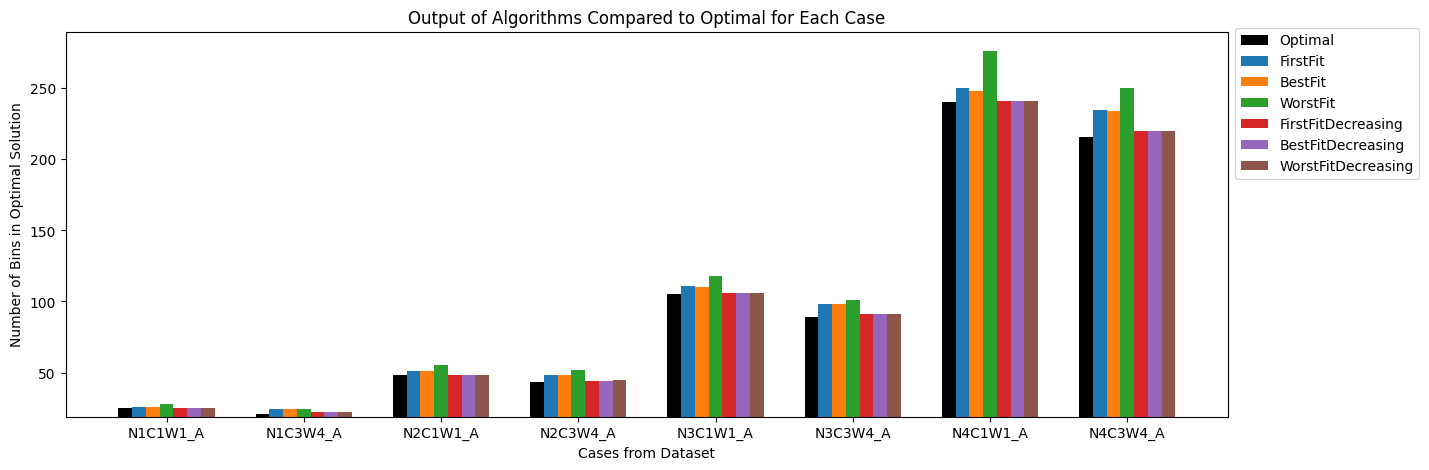

In [9]:
from plotter import BinNumberPlot
plot = BinNumberPlot()
plot.plot(plotList1, listOfBinppCases, BinppReader)

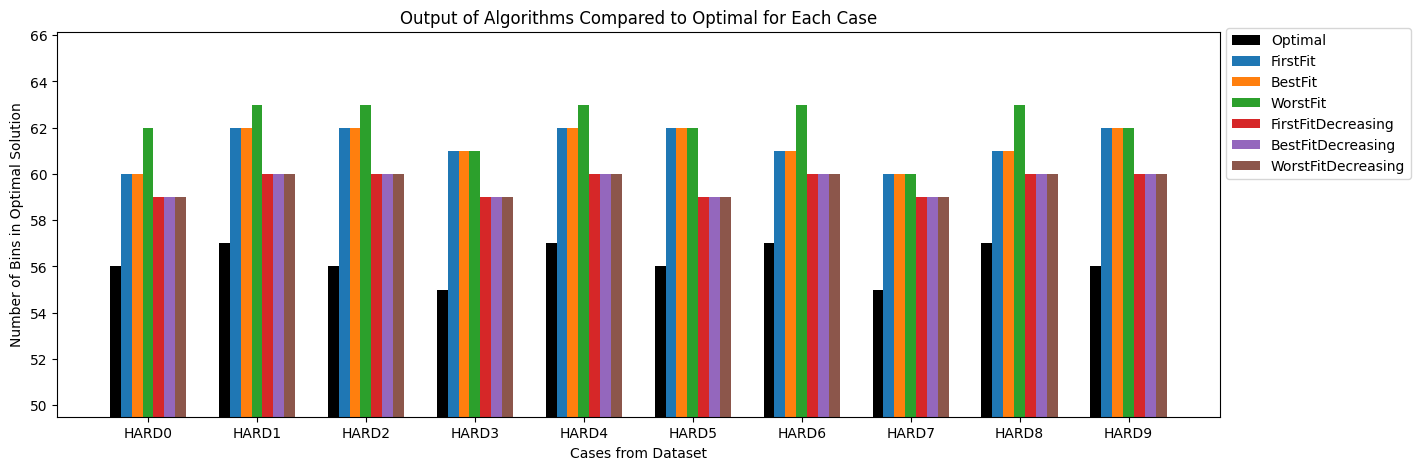

In [10]:
plot.plot(plotList2, listOfBinppHardCases, BinppReader)

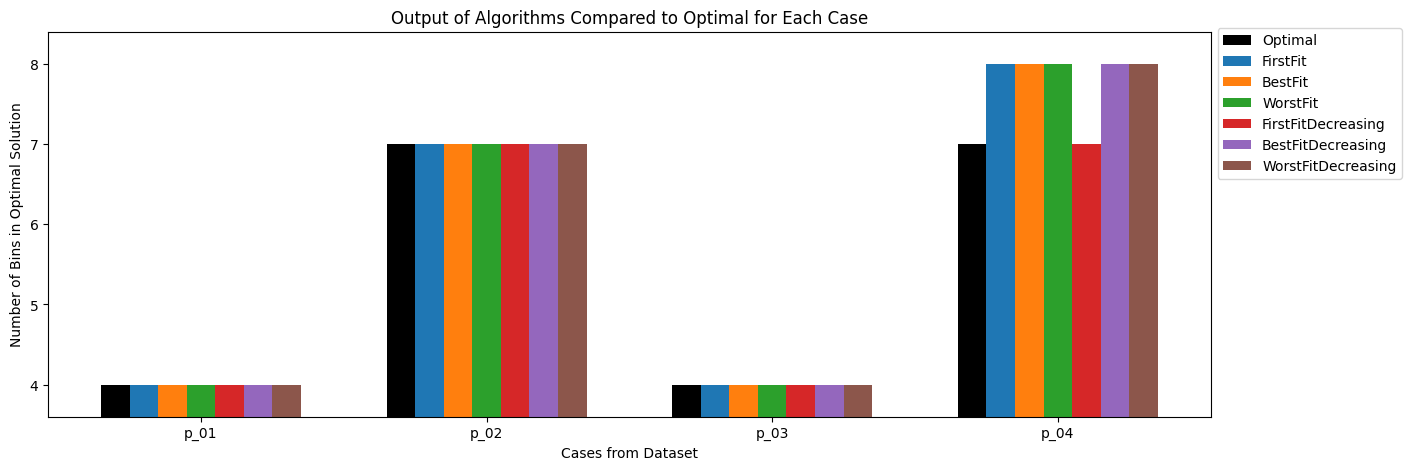

In [11]:
plot.plot(plotList3, listOfJburkardtCases, JburkardtReader)

### &rarr; Design Choices for Oracle Comparison

The format of the given data is automatically compared against the given Oracle dictionary for the dataset class given above (ex. binppDict). The `binNumber()` function takes in a list of algorithms to avoid having to make multiple plots, and gives a user friendly approach to passing in data. The `BinNumberPlot` class inherits the `Plotter` class and provides a way to normalize the given data to output a solution in comparison to the optimal. This can be seen in the black bar that indicates the optimal solution, which is both not present in the given dataset, nor in the execution time benchmarks. 

All the design choices follow separation of concern and are defined on multiple helper functions. Each algorithm is identified independently regardless of class and is analyzed in a similar manner to the KPI benchmarks aforementioned.

#### Visual Analysis
We can further support our statements regarding number of bins of each algorithm through the trends of the graphs. Among the three algorithms, First, Best, and Worst Fit, we can see that Worst Fit creates the greatest average amount of bins, Best Fit creates the least average number of bins, and First Fit is intermediate. We can also observe that their offline (decreasing) counterparts perform better in achieving their goals compared to online algorithms.

#### Problematic Dataset Cases

We found that the class of cases `binpp` to be problematic in the experiment, particularly in the plotting of the data. As the dimensions of each instance of the problem increased, this lead to an increase in the number of bins, resulting in a bar graph that becomes increasingly more difficult to read as you go to the left of the graph.

## Addition: Refined First Fit

`Refined First Fit` is an online algorithm where items are first put through the process of normalization, then placed into a respective bin class based on their classification.
Normalization of items is done using the weights of the items with respect to the maximum capacity of the bins. If an item’s weight is (1/2,1] of the total bin capacity, then it is classified as an `A-piece`. Similarly, items are classified as `B1, B2, X-pieces` if their weights are (2/5, 1/2], (1/3, 2/5], (0, 1/3] of the total bin capacity respectively. 

An individual item is then assigned to a specific bin class based on the following criteria. If an item is an A, B1, or X piece, it is assigned to a class 1, 2, 4 bin respectively. If the item is a B2 piece and it is the (mk)th B2 piece seen so far, where m ∈ {6, 7, 8, 9} and any integer k >= 1, then the item is assigned to a class 1 bin. Otherwise, if the B2 piece is not the (mk)th B2 piece that we have seen so far, then the item is assigned to class 3.

Once the item is assigned to a specific class of bins, the item is placed into bins of that class according to the First Fit algorithm.

### Benchmarking

Below, we have introduced the `RefinedFirstFit` algorithm into the existing benchmark protocol for a given sample dataset. Both tabular results for KPIs as well as comparison to the optimal solution are depicted below:

In [12]:
from macpacking.algorithms.online import RefinedFirstFit

algorithms = [FirstFit(), BestFit(), WorstFit(), RefinedFirstFit(), FirstFitDecreasing(), BestFitDecreasing(), WorstFitDecreasing()]
CASES = './_datasets/binpp/N2C2W2'
cases = list_case_files(CASES)


print("Analysis of Average Bins Created")
print("─" * 32)
benchmark.numberBins(cases, BinppReader, algorithms)

print("Analysis of Average Bin Usage as Percentage")
print("─" * 43)
benchmark.binUsage(cases, BinppReader, algorithms)

print("Analysis of Average Remaining Space")
print("─" * 35)
benchmark.remainingSpace(cases, BinppReader, algorithms)

print("Analysis of Average Comparisons")
print("─" * 31)
benchmark.numberComparisons(cases, BinppReader, algorithms)

Analysis of Average Bins Created
────────────────────────────────
FirstFit:            55.75     
BestFit:             55.05     
WorstFit:            61.35     
RefinedFirstFit:     65.85     
FirstFitDecreasing:  52.6      
BestFitDecreasing:   52.6      
WorstFitDecreasing:  52.65     


Analysis of Average Bin Usage as Percentage
───────────────────────────────────────────
FirstFit:            89.3086   
BestFit:             90.4392   
WorstFit:            81.151    
RefinedFirstFit:     75.6256   
FirstFitDecreasing:  94.6919   
BestFitDecreasing:   94.6919   
WorstFitDecreasing:  94.5991   


Analysis of Average Remaining Space
───────────────────────────────────
FirstFit:            12.8297   
BestFit:             11.473    
WorstFit:            22.6187   
RefinedFirstFit:     29.2492   
FirstFitDecreasing:  6.3697    
BestFitDecreasing:   6.3697    
WorstFitDecreasing:  6.4811    


Analysis of Average Comparisons
───────────────────────────────
FirstFit:            2454.65   


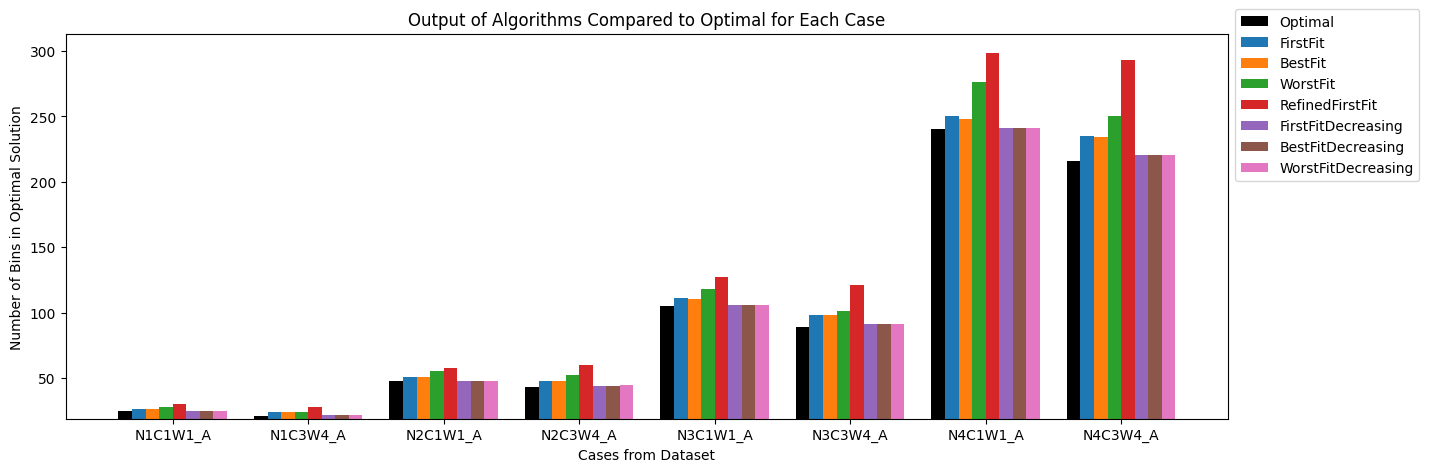

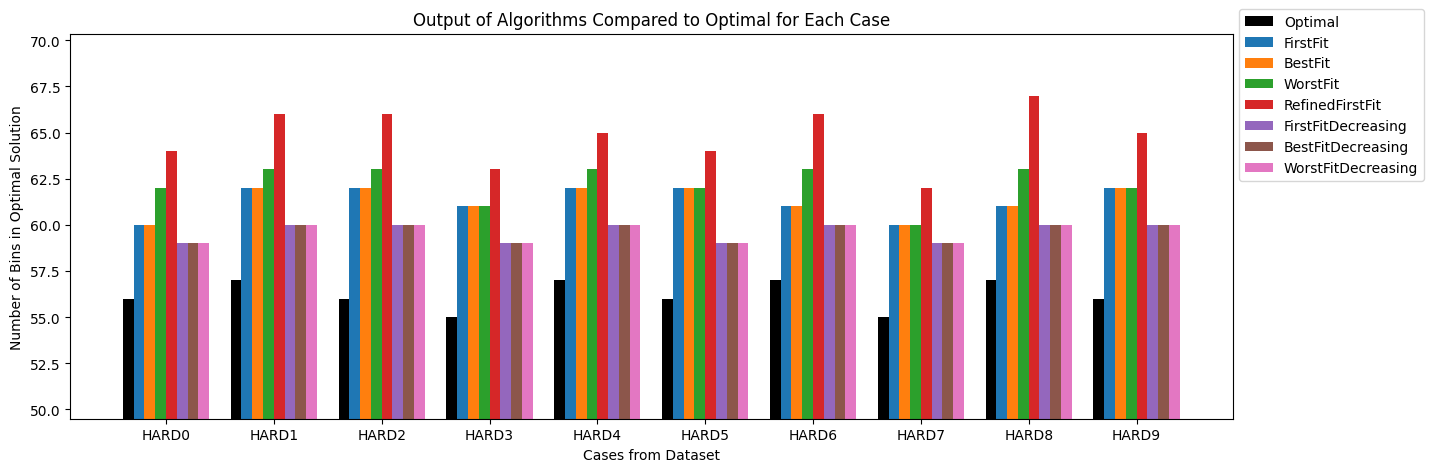

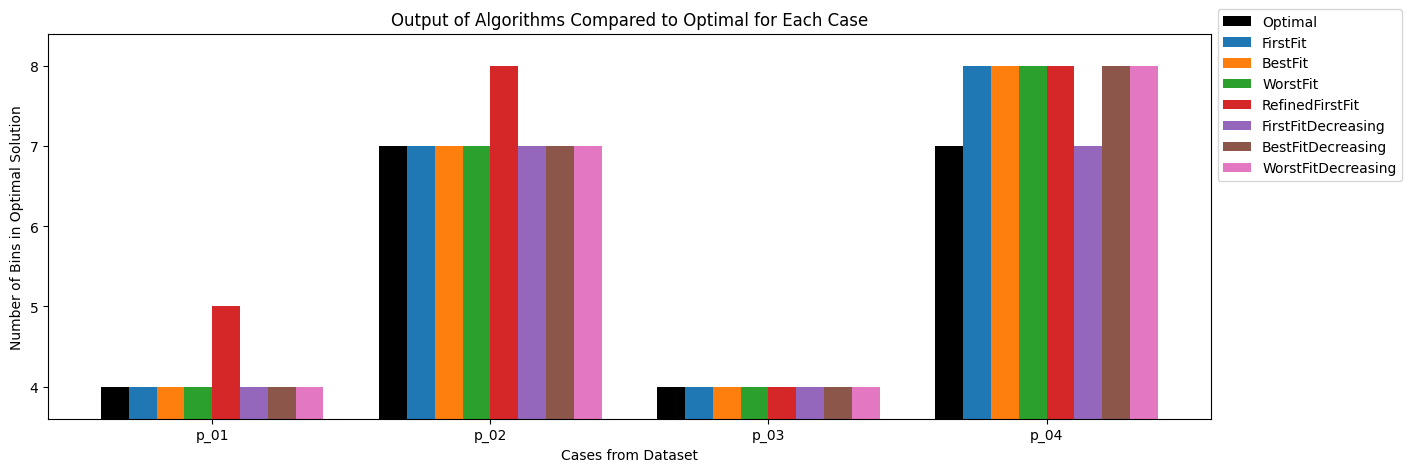

In [13]:
plotList1 = oracle.binNumber(listOfBinppCases, BinppReader, algorithms, binppDict, False)
plotList2 = oracle.binNumber(listOfBinppHardCases, BinppReader, algorithms, binppHardDict, False)
plotList3 = oracle.binNumber(listOfJburkardtCases, JburkardtReader, algorithms, jburkardtDict, False)

plot.plot(plotList1, listOfBinppCases, BinppReader)
plot.plot(plotList2, listOfBinppHardCases, BinppReader)
plot.plot(plotList3, listOfJburkardtCases, JburkardtReader)



### Analysis

Since RefinedFirstFit is not of the AnyFit class, the algorithm has the chance to create a new bin, despite the fact that the current item may fit in an existing bin from another class. This allows us to reason that RefinedFirstFit is the worst in terms of average number of bins, as none of our AnyFit algorithms create unnecessary new bins. 


The average percentage of bin usage can also be argued to be lower than the other AnyFit algorithms. As we have the potential to ignore existing bins in favor for a new bin, we may end up leaving free space unaccounted for, leading to lesser average bin usage.


As RefinedFirstFit considers only a specific class of bins at a given time, we can reason that it requires the least number of comparisons of all the algorithms. Compared to our AnyFit algorithms that consider the entire list of existing bins, we partition the list of existing bins into classes, and so we only need to make comparisons using the entire partition in the worst case. 

In addition, the algorithm adapts FirstFit in the way a bin is chosen, so for a given partition, we typically are not required to compare against all of the bins in the partition to find a suitable bin to stop.
Using a similar argument to number of comparisons, we reason that RefinedFirstFit’s average execution time is the least among the algorithms. This is due to the average length of RefinedFirstFit’s iterations through the list of existing bins being the smallest.

## Addition: Fixed Number of Bins

Standard capacity binpacking is introduced a new way to interpret the binpacking problem. This approach involves defining a fixed number of bins that the defined offline binpacking algorithm must use, all with varying capacities. The algorithm cannot  increase or decrease the size of the number of bins, and aims to evenly pack all the bins with respect to the given weights. 

A baseline was implemented using the standard `binpacking` library, using `to_constant_bin_number()`. This function takes the weightset as well as the number of fixed bins. In addition, an algorithm named `MultiFit` was implemented in the library to allow for comparison and benchmarking. 


The implementation of these two standard capacity binpacking algorithms required the library to undergo some minor modifications. Class definitions for these algorithms were inherited from the `Offline` class. The inherited abstract method was modified by allowing the user to input a number representing the fixed number of bins required for the algorithm. This is used as a `self` attribute, meaning that no modifications needed to be made to the existing structure of the code. The output of the algorithm using this attribute is standardized for any dataset category, KPI, or plot. This further reinforces the single responsibility design of the codebase, as well as the separation of concern of processing the given data based on parameters. The standardized output allows all remaining benchmarks to perform exactly as they are. 


#### &rarr; About MultiFit

The `MultiFit` algorithm is one that allows for the solution of the `Multiway Number Partitioning` problem, and we begin with a set of item weights `S`, and the max number of bins n. We require from this algorithm that the heaviest bin in the solution is the lightest it can be. 

Let `L := max {sum(S)/n, max(S)}`, `U := max {2sum(S)/n, max(S)}`, and `k` be the precision parameter. We will iterate the following loop `k` times.

Run `FirstFitDecreasing` where the item weights are S, and the max capacity of the items are `C := (L+U)/2`. We analyze the result of First Fit Decreasing. If the solution requires at most n bins, then `U := C`. Otherwise, `L := C`.


After the `k` iterations, we run First Fit Decreasing with capacity `U`, which guarantees to use at most `n` bins. The solution to this instance of First Fit Decreasing is the solution to the Multiway Number Partitioning problem.



### Benchmarking

Using the benchmarking protocol defined earlier, we can run KPI benchmarks and plots to compare the baseline against the MultiFit algorithm.

In [14]:
from macpacking.algorithms.offline import FixedNumBins, MultiFit

algorithms = [FixedNumBins(50), MultiFit(50)]
CASES = './_datasets/binpp/N2C2W2'
cases = list_case_files(CASES)


print("Analysis of Average Bins Created")
print("─" * 32)
benchmark.numberBins(cases, BinppReader, algorithms)

print("Analysis of Average Bin Usage as Percentage")
print("─" * 43)
benchmark.binUsage(cases, BinppReader, algorithms)

print("Analysis of Average Remaining Space")
print("─" * 35)
benchmark.remainingSpace(cases, BinppReader, algorithms)

print("Analysis of Average Comparisons")
print("─" * 31)
benchmark.numberComparisons(cases, BinppReader, algorithms)


Analysis of Average Bins Created
────────────────────────────────
FixedNumBins:        50.0      
MultiFit:            50.0      


Analysis of Average Bin Usage as Percentage
───────────────────────────────────────────
FixedNumBins:        99.5275   
MultiFit:            99.5275   


Analysis of Average Remaining Space
───────────────────────────────────
FixedNumBins:        0.567     
MultiFit:            0.567     


Analysis of Average Comparisons
───────────────────────────────
FixedNumBins:        0.0       
MultiFit:            1917827.5 




The number of `50` bins was chosen based on the number of bins used by the rest of the classical algorithms. This number yields an extremely high percentage usage and very low remaining space for each bin. However, an inconsistency is spotted in the average comparisons. This is discussed below.

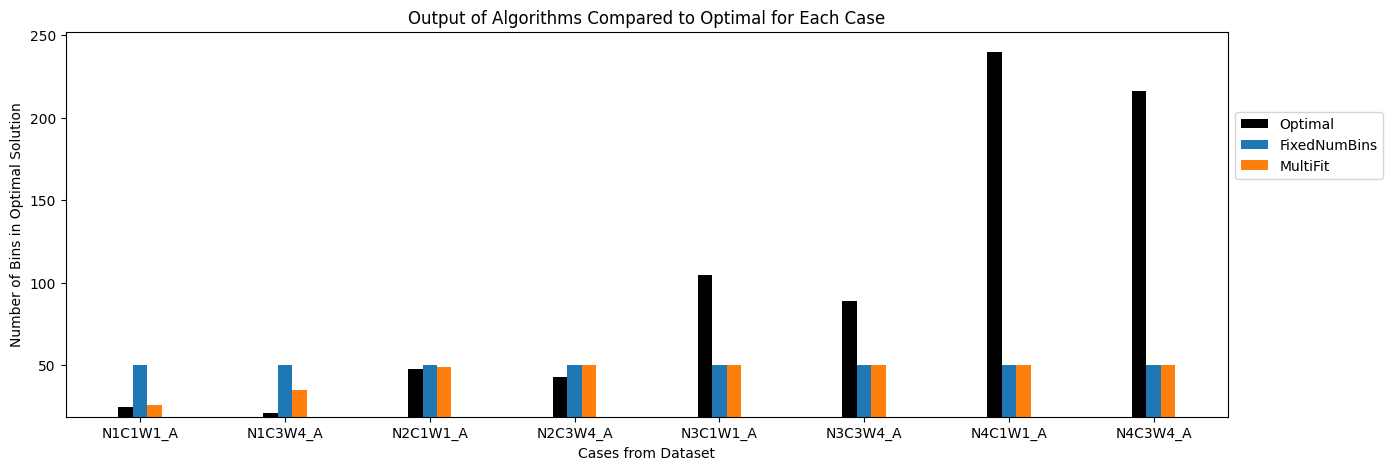

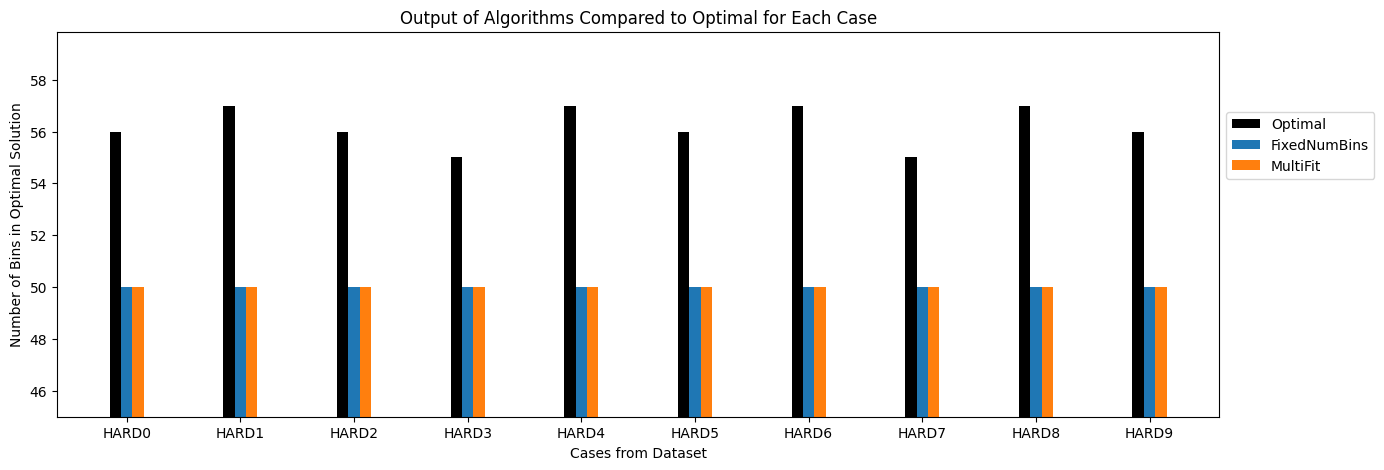

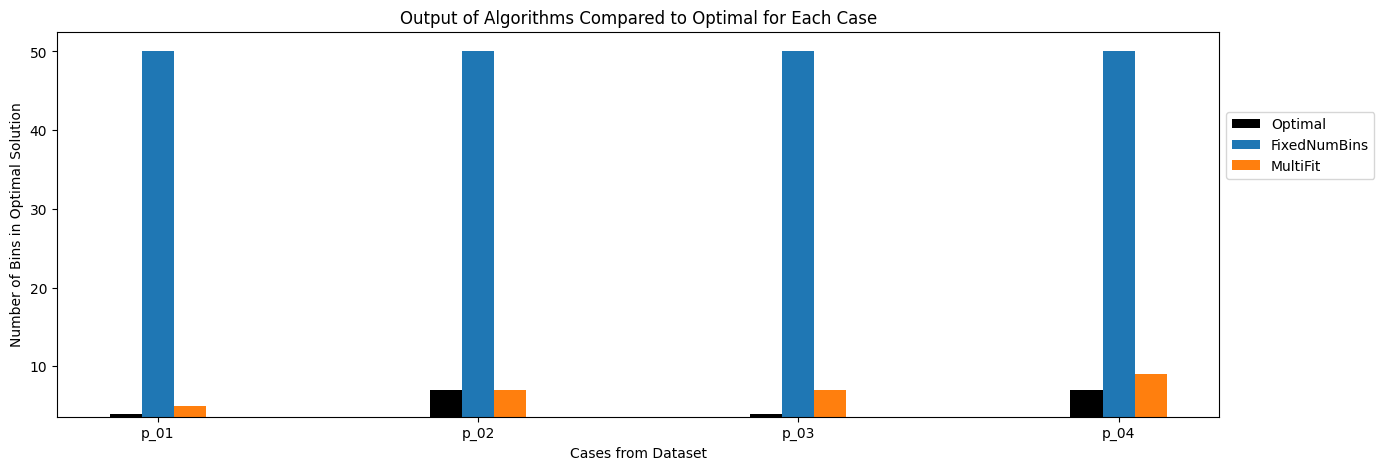

In [15]:
plotList1 = oracle.binNumber(listOfBinppCases, BinppReader, algorithms, binppDict, False)
plotList2 = oracle.binNumber(listOfBinppHardCases, BinppReader, algorithms, binppHardDict, False)
plotList3 = oracle.binNumber(listOfJburkardtCases, JburkardtReader, algorithms, jburkardtDict, False)

plot.plot(plotList1, listOfBinppCases, BinppReader)
plot.plot(plotList2, listOfBinppHardCases, BinppReader)
plot.plot(plotList3, listOfJburkardtCases, JburkardtReader)

While the baseline outputs the same number of bins per solution, regardless of size, the MultiFit algorithm uses up to the maximum number of bins. By making delegations to the FirstFitDecreasing algorithm, it does not return a solution with empty bins, unlike the baseline.

### Are the KPIs Reusable?

Since the solution of these implemented algorithms is standardized for any KPI, average number of bins, percentage usage and remaining space are all reusable KPIs. More generally, the code is implemented in an expandable manner, allowing many KPIs, class definitions, and benchmarking protocol to be reusable.


However, unlike MultiFit, the baseline method implemented within Python does not allow us to assess how many comparisons are made to the existing bins. This renders the comparison KPI invalid, as the attribute for `self.comparisons` is not manipulated or iterated at all. This is seen in the KPI benchmark output above, under `Analysis of Average Comparisons`.


The KPI results and plot results above demonstrate key flaws of the reusability of the code. Firstly, as mentioned, the code does not define a proper number of comparisons for the Python native library, making this KPI useless. Secondly, the plot output in the experiment for the optimal solution naively uses the same code to compare the output to the optimal solution defined by `oracle.xlsx`. This comparison has no value - while the optimal solution for each test case varies with the `Oracle`'s output, the fixed number of bins constrains the standard capacity algorithms. This is much like comparing apples to oranges - there's no value in this plot analysis.

However, due to the code being written in an expandable and adaptable manner, implementing a solution to this problem without the optimal solution from the `oracle.xlsx` does not violate the SOLID principles of single responsibility and separation of concern.


## Self-reflection questions

#### Arvind Shastri, shasta2

- **Backward:** I revised what mistakes my lab partner and I went through in Lab 1: there was a clear miscommunication that occurred during the beginning of the lab that gave us a major slow start. Although it did involve a large amount of rich discussion that contributed thoroughly to the analysis of our report, it didn't give us enough time to complete Week 2 and 3 as planned. I made sure to get a head start on this lab as soon as possible and keep the coursework from all my other courses on time as well, to make sure that there was no cramming or delays involved with the submission of this lab.
- **Inward:** I think I exceeded the standards that I had hoped for this assignment. In the 3 week time we were able to use everything we learned from Lab 1 and extend upon it to create refinable, adaptable, extendable code that is completely user friendly. There were definitely some hiccups in finding the time to make this lab COMPLETELY crisp and clear, and I definitely found myself catching errors in the code towards the end of the deadline, but the level of determination that I placed into this lab in comparison to the last one is unbelievable, even for me. I think I crushed every standard I had for this lab, and even though there were some setbacks, I cannot say to myself that I did bad in the slightest. I was incredibly motivated by how the professor rated our report in the previous lab and constantly told myself to exceed that standard and beat it.
- **Outward:** I hope that readers can understand the sheer amount of determination that was given into this lab - I personally poured my heart and soul into figuring out matplotlib and pyplot, and thought I did a fantastic job getting grouped bar outputs. The level of detail that we paid to the structure of the codebase and report was extensive and thorough, and I gave my all into making sure that every aspect of this lab was refined in a way that was understandable and explainable to the reader.
- **Forward:** There is still a lot I have to learn from professional practice, including benchmarking and plotting. These were concepts that my partner and I struggled with in L1, and even though we did smooth them out during this lab, there was still a lot of hassle trying to figure out the best way to do these plots. I have gained an incredible amount of experience coding sections of this lab, but I realize that there is still so much more that Python has to offer than I haven't learned yet, and so many more concepts in design patterns and reusability that I have not touched upon.


#### Stanley Nguyen, nguyes44


- **Backward:** The process for which I went through to produce this result was understanding and explaining the codebase’s SOLID principles, communicating the dataset structures, coming up with KPIs, and analyzing algorithms with respect to those KPIs. I felt capable being able to communicate and reason all of the results shown by my partner, and think that it is vital to be able to understand why results are they way they are.
- **Inward:** My standards were to fully elaborate each and every idea to its fullest to where my communication would answer any question that a reader could have while going through the report. In my opinion, I have met my standards, as I have tried to touch on every topic possible without being verbose and mentioning unnecessary details.
- **Outward:** When people look at my work, I want people to notice the organization of it and the detail put into it. In my opinion, that will make my work stand out from others and it proudly displays the effort that I have put into my work. In addition to this, the organization of my work will allow for readers to digest my work more easily, as humans are meant to take things one at a time.
- **Forward:** I have learned how to work with an existing codebase rather than start from scratch during this lab. The intricacies of working with an existing codebase include being able to understand and communicate the strengths of its design, and understand the structure of the codebase. I feel that this skill will be vital in my future career, as the tech industry often does not require an entirely new project, rather adaptation or extension of an existing project. “Don’t recreate the wheel” is an accurate reflection of such an idea.



